In [955]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Modules for ML
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier , BaggingClassifier , AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support, precision_score, recall_score, f1_score, precision_recall_curve, auc, roc_curve, roc_auc_score
plt.style.use('seaborn')
#train Model
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [956]:
spotify_df = pd.read_csv('/content/data.csv')


In [961]:
spotify_df.describe()


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [958]:
spotify_df.isna().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
song_title          0
artist              0
target              0
dtype: int64

In [960]:
spotify_df.shape

(2017, 17)

In [833]:
spotify_df.drop(columns='Unnamed: 0', inplace=True)

In [834]:
dist_cols=spotify_df.select_dtypes(include=['int64','float64']).columns.tolist()


In [835]:
dist_cols

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'target']

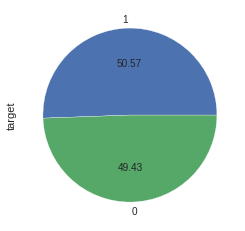

In [836]:
spotify_df['target'].value_counts().plot(kind='pie',autopct='%.2f',)

plt.show()

In [837]:
j=1
d=1

part1=spotify_df[dist_cols].columns[0:7]
part2=spotify_df[dist_cols].columns[7:14]


fig= make_subplots(rows=2, cols=7, start_cell ='top-left', subplot_titles=('acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness','loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'target'))


for k in part2:
    for i in part1:
        if j<8:
            fig.add_trace(go.Histogram(x=spotify_df[i]),row=1,col=j)
            j+=1
    if d<8:
        fig.add_trace(go.Histogram(x=spotify_df[k]),row=2,col=d)
        d+=1
fig.update_layout(bargap=.2,width=1100,height=500)
fig.show()

In [838]:
spotify_df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'song_title',
       'artist', 'target'],
      dtype='object')

In [839]:
from numpy import percentile


In [840]:
def remove_outliers(df,name='feature'):
    #Store the 25th and 75th percentile 
    q25,q75=percentile(df[name],25),percentile(df[name],75)
    #Calculate the Interquartile range
    iqr_cut=1.5*(q75-q25)
    #Create variable of lower and upper cut
    lower,upper=q25-iqr_cut,q75+iqr_cut
    #Remove the outliers
    df=df[(df[name] >= lower) & (df[name] <= upper)]
    return df

    

In [841]:
def remove_outliers_gaussian(df,name='feature'):
    #calculate the mean and standard deviation
    mean,std=np.mean(df[name]),np.std(df[name])
    #create the cut variable
    std_cut= 3*std
    #create variable of lower and upper cut
    lower,upper=mean-std_cut,mean+std_cut
    #Remove outliers
    df=df[(df[name] >= lower) & (df[name] <= upper)]
    return df

In [842]:
spotify_df1=spotify_df.copy()
spotify_df1=remove_outliers(spotify_df1,'acousticness')
len(spotify_df1)

1823

In [843]:
potify_df1=remove_outliers_gaussian(spotify_df1,'danceability')


In [844]:
spotify_df=remove_outliers(spotify_df,dist_cols[1])

In [845]:
len(spotify_df1)

1823

In [846]:

j=1
d=1

part1=spotify_df1[dist_cols].columns[0:7]
part2=spotify_df1[dist_cols].columns[7:14]


fig= make_subplots(rows=2, cols=7, start_cell ='top-left', subplot_titles=('acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness','loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'target'))


for k in part2:
    for i in part1:
        if j<8:
            fig.add_trace(go.Histogram(x=spotify_df[i]),row=1,col=j)
            j+=1
    if d<8:
        fig.add_trace(go.Histogram(x=spotify_df[k]),row=2,col=d)
        d+=1
fig.update_layout(bargap=.2,width=1100,height=500)
fig.show()

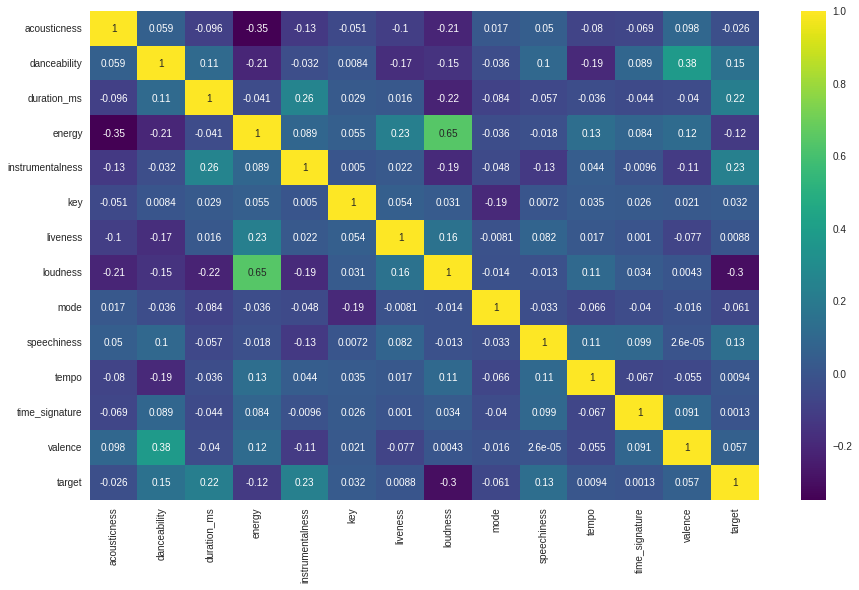

In [847]:
df_corr=spotify_df1.corr()
plt.figure(figsize=(15,9))
sns.heatmap(df_corr,annot=True,cmap='viridis');

In [848]:

fig= make_subplots(rows=1, cols=3, start_cell ='top-left', subplot_titles=('danceability vs target', 'duration_ms vs target',
       'instrumentalness vs target'))


fig.add_trace(go.Scatter(x=spotify_df['danceability'][spotify_df['target']==0],mode='markers',marker_size=5,name='discard'),row=1,col=1)
fig.add_trace(go.Scatter(x=spotify_df['danceability'][spotify_df['target']==1],mode='markers',marker_size=5,name='save'),row=1,col=1)
fig.add_trace(go.Scatter(x=spotify_df['duration_ms'][spotify_df['target']==0],mode='markers',marker_size=5,name='discard'),row=1,col=2)
fig.add_trace(go.Scatter(x=spotify_df['duration_ms'][spotify_df['target']==1],mode='markers',marker_size=5,name='save'),row=1,col=2)
fig.add_trace(go.Scatter(x=spotify_df['instrumentalness'][spotify_df['target']==0],mode='markers',marker_size=5,name='discard'),row=1,col=3)
fig.add_trace(go.Scatter(x=spotify_df['instrumentalness'][spotify_df['target']==1],mode='markers',marker_size=5,name='save'),row=1,col=3)
       
fig.update_layout(width=1100,height=500)
fig.show()

In [849]:
plt.figure(figsize=(15,15))
sns.pairplot(data=spotify_df, hue='target')
plt.show()

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f50a460b170> (for post_execute):


KeyboardInterrupt: ignored

<Figure size 1080x1080 with 0 Axes>

Error in callback <function flush_figures at 0x7f50a4616950> (for post_execute):


KeyboardInterrupt: ignored

In [850]:
spotify_df.artist.nunique()
spotify_df.artist[spotify_df.target == 1].nunique()

651

In [851]:
like=spotify_df[spotify_df.target == 1]
like.groupby('artist').sum()['target'].sort_values(ascending=False).head(20)

artist
Drake                     13
Disclosure                12
Crystal Castles            9
Kanye West                 8
FIDLAR                     8
CHVRCHES                   7
Young Thug                 7
Beach House                6
ASTR                       6
Grimes                     6
Future                     6
Hot Chip                   6
Purity Ring                5
The Partysquad             5
Duke Dumont                5
M83                        5
Tame Impala                5
Teams vs. Star Slinger     5
New Order                  5
ILoveMakonnen              5
Name: target, dtype: int64

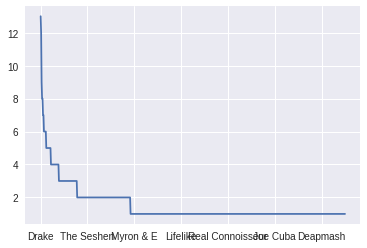

In [852]:
like.artist.value_counts().plot();

In [745]:
#x, y = spotify_df.drop('target',axis=1),spotify_df['target']

**Train Validation Test**

In [854]:
train_val_df,test_df=train_test_split(spotify_df1,test_size=0.2,random_state=2)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=2)

In [855]:
print('Train_df.shape:',train_df.shape)
print('Val_df.shape:',val_df.shape)
print('Test_df.shape',test_df.shape)
print('train_val_df.shape',train_val_df.shape)

Train_df.shape: (1093, 16)
Val_df.shape: (365, 16)
Test_df.shape (365, 16)
train_val_df.shape (1458, 16)


**Identity the inputs and target**

In [856]:
inputs_cols=spotify_df.columns.tolist()[:-1]
target_col='target'

In [857]:
print('inputs: {}'.format(inputs_cols))
print('target: {}'.format(target_col))

inputs: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'song_title', 'artist']
target: target


In [858]:
#Create train inputs and target
train_inputs=train_df[inputs_cols].copy()
train_target=train_df[target_col].copy()

#Create val inputs and target
val_inputs=val_df[inputs_cols].copy()
val_target=val_df[target_col].copy()

#Create test inputs and target
test_inputs=test_df[inputs_cols].copy()
test_target=test_df[target_col].copy()

In [859]:
numerical_cols=train_inputs.select_dtypes(include=['float64','int64']).columns.tolist()
# numerical_cols.pop(8)
encoded_cols=['mode']
categorical_cols=train_inputs.select_dtypes(include=['object']).columns.tolist()

In [860]:
val_inputs[numerical_cols].describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.116090,0.639636,245092.295890,0.729258,0.130144,5.613699,0.203005,-6.384504,0.597260,0.106367,123.708688,3.975342,0.518704
std,0.153751,0.157545,68505.204067,0.157283,0.269792,3.600416,0.163137,2.485508,0.491122,0.093267,26.329043,0.201492,0.260591
min,0.000005,0.164000,93267.000000,0.309000,0.000000,0.000000,0.023400,-16.794000,0.000000,0.023300,60.391000,3.000000,0.034800
25%,0.008140,0.535000,199853.000000,0.610000,0.000000,2.000000,0.096000,-8.104000,0.000000,0.042300,103.118000,4.000000,0.304000
50%,0.048100,0.644000,230747.000000,0.750000,0.000102,6.000000,0.133000,-6.122000,1.000000,0.067200,123.004000,4.000000,0.512000
75%,0.161000,0.757000,272720.000000,0.862000,0.053900,9.000000,0.279000,-4.563000,1.000000,0.134000,140.042000,4.000000,0.750000
max,0.648000,0.984000,590707.000000,0.994000,0.968000,11.000000,0.897000,-0.307000,1.000000,0.542000,199.988000,5.000000,0.967000


**Preproccessing** <br />
Feature scaling


In [861]:
scaler=MinMaxScaler()


In [862]:
train_inputs[numerical_cols]=scaler.fit_transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=scaler.fit_transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=scaler.fit_transform(test_inputs[numerical_cols])

In [863]:
test_inputs[numerical_cols].describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.185078,0.595163,0.276697,0.679960,0.136602,0.470486,0.205015,0.682261,0.580822,0.151703,0.399794,0.493151,0.500981
std,0.234606,0.182219,0.104177,0.193458,0.278388,0.332413,0.181853,0.147151,0.494102,0.190196,0.202083,0.086648,0.252752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011080,0.478107,0.219370,0.581451,0.000000,0.090909,0.084055,0.607654,0.000000,0.029905,0.240422,0.500000,0.305123
50%,0.087019,0.617751,0.253859,0.699168,0.000080,0.545455,0.125580,0.703296,1.000000,0.072289,0.396913,0.500000,0.499517
75%,0.289053,0.714793,0.306267,0.824019,0.045026,0.727273,0.289926,0.783408,1.000000,0.171687,0.524177,0.500000,0.682096
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Label encoding**

In [864]:
encoder=LabelEncoder()


In [865]:
train_inputs['song_title']=encoder.fit_transform(train_inputs['song_title'])
val_inputs['song_title']=encoder.fit_transform(val_inputs['song_title'])
test_inputs['song_title']=encoder.fit_transform(test_inputs['song_title'])



In [866]:
train_inputs['artist']=encoder.fit_transform(train_inputs['artist'])
val_inputs['artist']=encoder.fit_transform(val_inputs['artist'])
test_inputs['artist']=encoder.fit_transform(test_inputs['artist'])

In [867]:
encoded_cols=['mode','song_title','artist']

In [868]:
train_inputs[categorical_cols]

,song_title,artist
491,226,330
698,633,188
540,692,652
1849,612,784
2005,839,245
...,...,...
1409,636,351
942,738,298
1326,695,689
1956,786,373


In [869]:
X_train=train_inputs[numerical_cols + encoded_cols]
X_val= val_inputs[numerical_cols + encoded_cols]
X_test=test_inputs[numerical_cols + encoded_cols]

In [870]:
X_test


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,mode,song_title,artist
1946,0.443742,0.650888,0.234829,0.657551,0.000637,0.090909,0.076653,0.603520,1.0,0.000000,0.217841,0.5,0.657394,1.0,28,12
2016,0.004377,0.383432,0.225508,0.902497,0.000041,0.818182,0.246017,0.696425,1.0,0.253442,0.896988,0.5,0.388895,1.0,154,30
832,0.340616,0.794083,0.213173,0.536266,0.000005,0.363636,0.409108,0.681508,0.0,0.126721,0.531301,0.5,0.128987,0.0,50,107
498,0.008877,0.701775,0.396204,0.430440,0.808377,0.454545,0.095847,0.429441,0.0,0.100473,0.448333,0.5,0.948448,0.0,282,203
1176,0.003830,0.485207,0.220964,0.739596,0.000116,0.636364,0.164471,0.670223,0.0,0.419105,0.747121,0.5,0.217055,0.0,32,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,0.015158,0.444970,0.238771,0.629013,0.811518,0.272727,0.430435,0.385028,1.0,0.034854,0.318682,0.5,0.795940,1.0,66,280
810,0.323428,0.494675,0.413116,0.064209,0.080105,0.000000,0.391544,0.000000,0.0,0.049269,0.248493,0.0,0.398561,0.0,329,264
302,0.296865,0.687574,0.253731,0.304400,0.000006,0.545455,0.249780,0.494972,0.0,0.012048,0.615052,0.5,0.832456,0.0,165,31
1771,0.728121,0.607101,0.273074,0.456599,0.000000,0.636364,0.038264,0.590223,1.0,0.003012,0.225435,0.5,0.586511,1.0,90,58


**Train the Model**
<br/>
Logistic Regression is a supervised learning model which output is binary. It used the weight sum of the inputs variables into the sigmoid function and outputs a binary variable either 0 or 1

In [871]:
logistic_reg=LogisticRegression(solver='liblinear').fit(X_train,train_target)

In [872]:
train_preds=logistic_reg.predict(X_train)

In [873]:
accuracy_score(train_target,train_preds)

0.7081427264409881

In [874]:
val_preds=logistic_reg.predict(X_val)
accuracy_score(val_target,val_preds)

0.6958904109589041

In [875]:
def predict_plot(inputs,target,name=''):
    preds=model.predict(inputs)
    acc=accuracy_score(target,preds)
    cf=confusion_matrix(target,preds)
    plt.figure()
    sns.heatmap(cf,annot=True)
    plt.xlabel('prediction')
    plt.ylabel('target')
    plt.title(name)
    print('Accuracy{:.2f}'.format(acc*100))

In [825]:
train_inputs

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
483,0.429000,0.857,287200,0.889,0.000005,6,0.1430,-4.382,1,0.0795,103.072,4,0.820,Bop Gun (One Nation) - Radio Edit,Ice Cube
1496,0.267000,0.732,172751,0.629,0.000000,0,0.1180,-4.640,1,0.2860,91.700,4,0.685,Overwhelming,Jon Bellion
435,0.005290,0.563,200600,0.924,0.883000,10,0.1450,-3.909,0,0.0511,94.057,4,0.600,Caffeinated Consciousness,TV On The Radio
312,0.118000,0.704,288347,0.894,0.000115,6,0.3860,-7.415,1,0.2430,98.946,4,0.408,Frontier Psychiatrist,The Avalanches
1449,0.025600,0.559,210968,0.854,0.000003,11,0.2940,-3.923,0,0.0360,156.008,4,0.474,Limitless (feat. Sophie Rose),Sam F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,0.078800,0.873,301200,0.591,0.007100,7,0.1040,-8.942,1,0.1020,123.091,4,0.490,Together Again,Janet Jackson
31,0.021900,0.897,285240,0.642,0.000001,2,0.1590,-8.828,1,0.0534,127.984,4,0.270,Blasé (feat. Future & Rae Sremmurd),Ty Dolla $ign
460,0.394000,0.760,520133,0.971,0.775000,5,0.1380,-4.582,0,0.0549,125.439,4,0.992,Abataka - Original Mix,Ida Engberg
907,0.000885,0.790,312000,0.427,0.446000,11,0.0514,-11.361,0,0.0541,116.986,4,0.961,Nothing,HNNY


Train Accuracy:100.00%
Validation Accuracy:64.66%


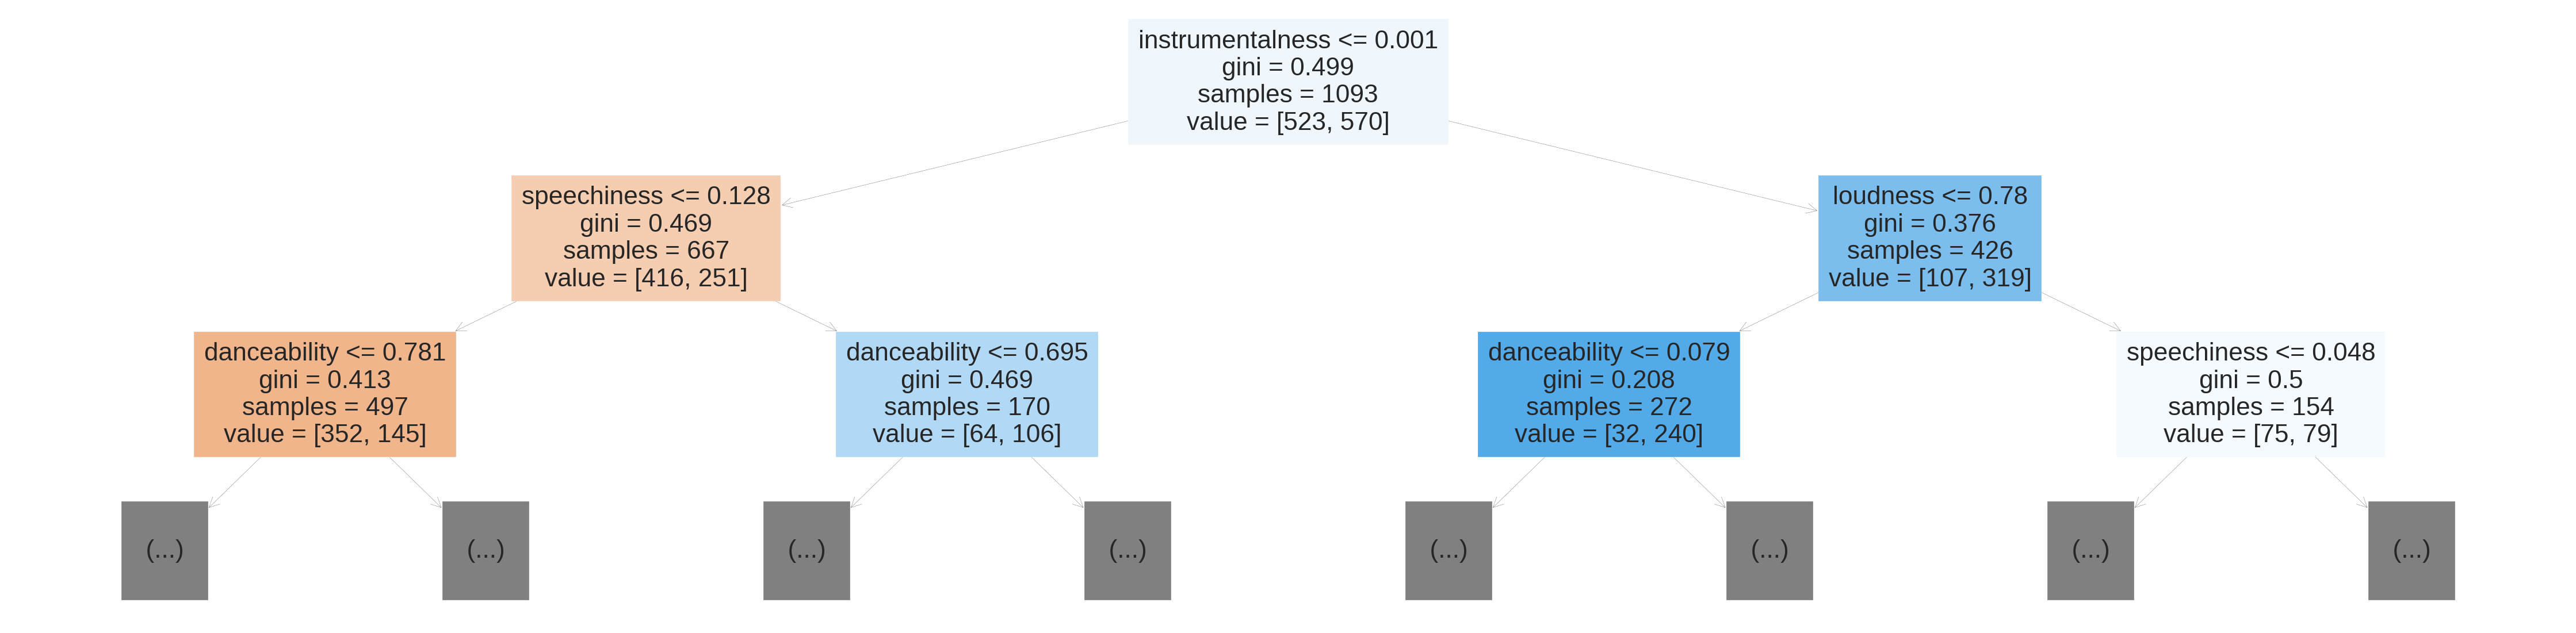

In [876]:

#Train the model
model = DecisionTreeClassifier(random_state=2).fit(X_train,train_target)

#Make prediction
train_preds=model.predict(X_train)

#Evaluate the train_inputs
train_acc=accuracy_score(train_target,train_preds)
print('Train Accuracy:{:.2f}%'.format(train_acc*100))
#Evaluate the val_inputs
val_preds=model.predict(X_val)
val_acc=accuracy_score(val_target,val_preds)
print('Validation Accuracy:{:.2f}%'.format(val_acc*100))

#Plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,max_depth=2,filled=True);

In [877]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=2)
%time
model.fit(X_train,train_target)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.44 µs


DecisionTreeClassifier(random_state=2)

In [878]:
train_preds=model.predict(X_train)

In [879]:
accuracy_score(train_target,train_preds)


1.0

In [880]:
val_preds=model.predict(X_val)
accuracy_score(val_target,val_preds)

0.6465753424657534

In [881]:
from sklearn.tree import plot_tree, export_text

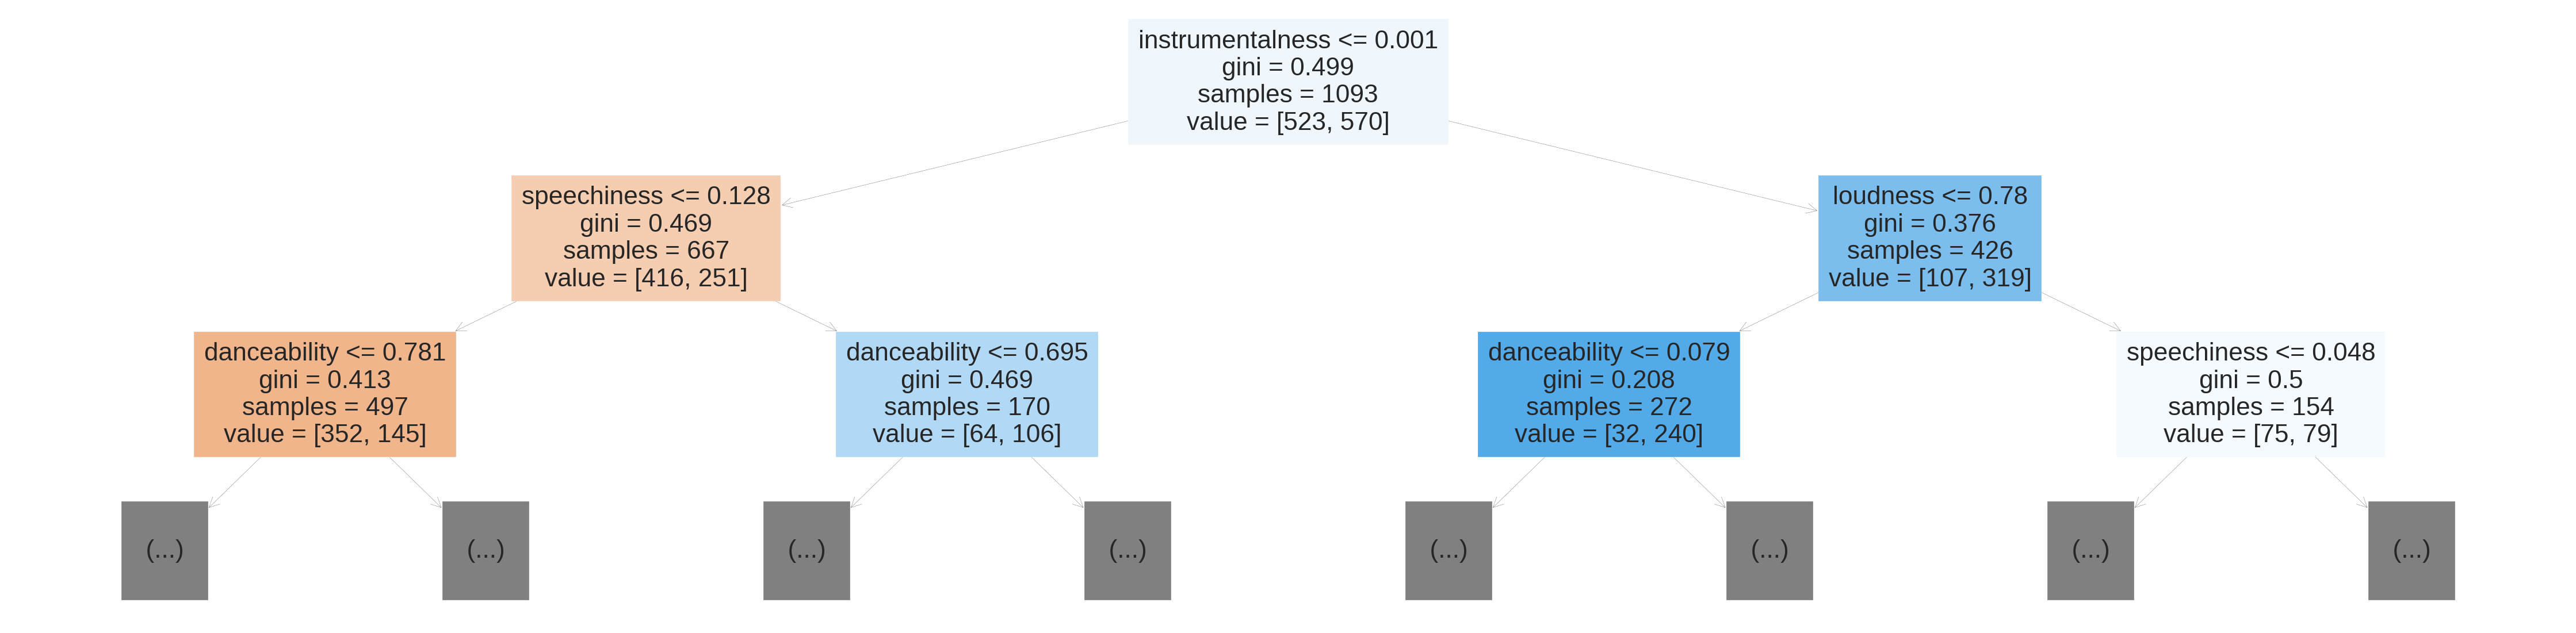

In [882]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,max_depth=2,filled=True);

In [883]:
model.tree_.max_depth

21

In [884]:
tree_text= export_text(model,max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- instrumentalness <= 0.00
|   |--- speechiness <= 0.13
|   |   |--- danceability <= 0.78
|   |   |   |--- danceability <= 0.37
|   |   |   |   |--- duration_ms <= 0.22
|   |   |   |   |   |--- artist <= 29.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- artist >  29.00
|   |   |   |   |   |   |--- song_title <= 148.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- song_title >  148.00
|   |   |   |   |   |   |   |--- acousticness <= 0.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- acousticness >  0.00
|   |   |   |   |   |   |   |   |--- artist <= 786.00
|   |   |   |   |   |   |   |   |   |--- acousticness <= 0.73
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- acousticness >  0.73
|   |   |   |   |   |   |   |   |   |   |--- valence <= 0.26
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- valence >  0.26


In [885]:
model.feature_importances_

array([0.07970298, 0.10462642, 0.05091087, 0.03482575, 0.16850811,
       0.01099677, 0.05781731, 0.10471279, 0.00968727, 0.13063558,
       0.08549069, 0.00170227, 0.05256439, 0.00366643, 0.06063542,
       0.04351695])

In [886]:
importance_df= pd.DataFrame({
    'feature':X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance',ascending=False)

In [887]:
importance_df.head(10)

,feature,importance
4,instrumentalness,0.168508
9,speechiness,0.130636
7,loudness,0.104713
1,danceability,0.104626
10,tempo,0.085491
0,acousticness,0.079703
14,song_title,0.060635
6,liveness,0.057817
12,valence,0.052564
2,duration_ms,0.050911


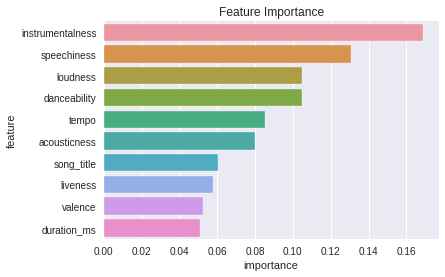

In [888]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance',y='feature');

In [889]:
model=DecisionTreeClassifier(max_depth=7, random_state=2)
model.fit(X_train, train_target)
model.score(X_train,train_target)
model.score(X_val,val_target)

0.684931506849315

#Model Building and Predictions ANN

In [893]:
model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(16,), activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),

])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    
)


In [894]:
model.fit(X_train, train_target, epochs=200) #Runned Twice

Epoch 1/200
35/35 [==============================] - 1s 2ms/step - loss: 32.9886 - accuracy: 0.4803
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 6.8162 - accuracy: 0.5069
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 2.0898 - accuracy: 0.5224
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 1.1650 - accuracy: 0.5059
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 0.9290 - accuracy: 0.5133
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 0.9054 - accuracy: 0.5023
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 0.8195 - accuracy: 0.5032
Epoch 8/200
35/35 [==============================] - 0s 2ms/step - loss: 0.8209 - accuracy: 0.4913
Epoch 9/200
35/35 [==============================] - 0s 2ms/step - loss: 0.7659 - accuracy: 0.5041
Epoch 10/200
35/35 [==============================] - 0s 2ms/step - loss: 0.7321 - accuracy: 0.5160
Epoch 11

In [896]:
model.evaluate(X_test, test_target)

12/12 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.6329


[0.6566672325134277, 0.6328766942024231]

In [903]:
def predict(data):
    pred = model.predict(data).flatten()
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def plot_cm(y_true,y_pred,title=None):
    cm = confusion_matrix(y_true, y_pred)
    x_axis_labels = ["Yes", "No"]
    y_axis_labels = ["Yes", "No"]
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt='g',cmap='YlGnBu',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    plt.title(title)
    plt.show()

#Test Data Report

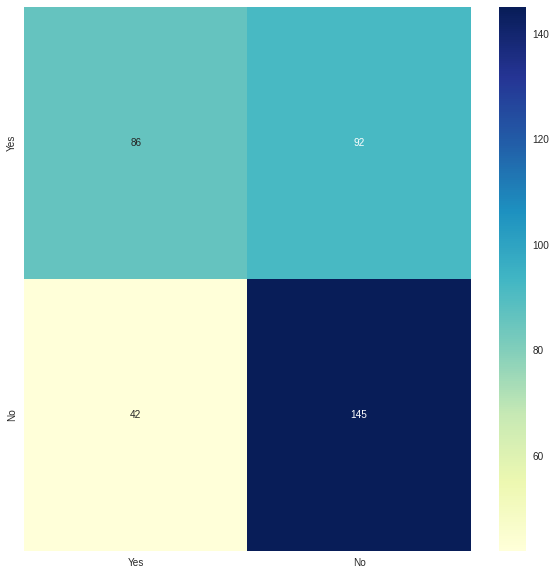

In [904]:
y_pred_test = predict(X_test)
plot_cm(test_target, y_pred_test)

In [928]:
print(classification_report(val_target, y_pred_test))

              precision    recall  f1-score   support

           0       0.48      0.38      0.43       163
           1       0.57      0.67      0.62       202

    accuracy                           0.54       365
   macro avg       0.53      0.53      0.52       365
weighted avg       0.53      0.54      0.53       365



#Improved The model

In [906]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=2)
    model.fit(X_train, train_target)
    train_acc = 1 - model.score(X_train, train_target)
    val_acc= 1 - model.score(X_val, val_target)
    
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}
    

In [907]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,16)])

CPU times: user 346 ms, sys: 340 µs, total: 347 ms
Wall time: 369 ms


In [908]:
errors_df.sort_values('Validation Error',ascending=True).head(20)

,Max Depth,Training Error,Validation Error
2,3,0.252516,0.290411
8,9,0.070448,0.312329
6,7,0.117109,0.315068
12,13,0.022873,0.315068
4,5,0.187557,0.320548
10,11,0.037511,0.320548
1,2,0.289113,0.323288
9,10,0.049405,0.323288
3,4,0.231473,0.328767
7,8,0.096981,0.328767


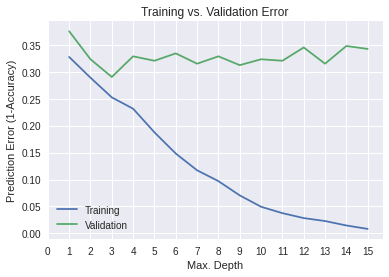

In [909]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,16))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1-Accuracy)')
plt.legend(['Training','Validation'])
plt.show()

In [910]:
model=DecisionTreeClassifier(max_depth=9, random_state=2).fit(X_train,train_target)
print("Score train", model.score(X_train,train_target))
print("Score test", model.score(X_val,val_target))

Score train 0.929551692589204
Score test 0.6876712328767123


In [912]:
def max_leaf_error(ml):
    model = DecisionTreeClassifier(max_leaf_nodes=ml, random_state=3)
    model.fit(X_train, train_target)
    train_acc = 1 - model.score(X_train, train_target)
    val_acc= 1 - model.score(X_val, val_target)
    
    return {'Max Leaf': ml, 'Training Error': train_acc, 'Validation Error': val_acc}
    

In [913]:
%%time 
error_ml_df=pd.DataFrame([max_leaf_error(ml) for ml in range(2,128)])

CPU times: user 3.02 s, sys: 5.15 ms, total: 3.03 s
Wall time: 3.18 s


In [914]:
error_ml_df.sort_values('Validation Error',ascending=True).head(20)

,Max Leaf,Training Error,Validation Error
5,7,0.254346,0.301370
4,6,0.256176,0.309589
49,51,0.121683,0.312329
32,34,0.150961,0.312329
31,33,0.153705,0.312329
50,52,0.119854,0.312329
29,31,0.158280,0.315068
51,53,0.118024,0.315068
52,54,0.118024,0.315068
38,40,0.139067,0.315068


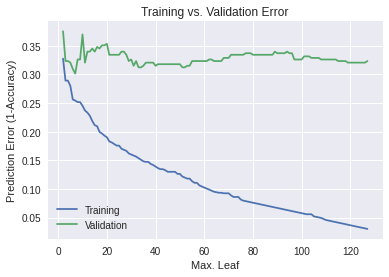

In [918]:
plt.figure()
plt.plot(error_ml_df['Max Leaf'], error_ml_df['Training Error'])
plt.plot(error_ml_df['Max Leaf'], error_ml_df['Validation Error'])
plt.title('Training vs. Validation Error')
# plt.xticks(range(2,128,8))
plt.xlabel('Max. Leaf')
plt.ylabel('Prediction Error (1-Accuracy)')
plt.legend(['Training','Validation'])
plt.show()

In [925]:
Model=DecisionTreeClassifier(max_depth=9,max_leaf_nodes=69,random_state=2).fit(X_train,train_target)
Model.score(X_val,val_target)

0.673972602739726

# Train the Model<br />
#Random Forest Classifier :<br/> 
Random Forest is a supervised learning model that use ensemble learning of many decision trees which output is based on the mean of outputs of thoses trees.


In [932]:
model = RandomForestClassifier(n_jobs=-1, random_state=2).fit(X_train,train_target)
print(model.score(X_train,train_target))

print(model.score(X_val,val_target))

importance_df= pd.DataFrame({
    'feature': X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

1.0
0.7561643835616438


In [933]:
importance_df.head(10)

,feature,importance
4,instrumentalness,0.148512
7,loudness,0.122038
9,speechiness,0.096732
1,danceability,0.085196
2,duration_ms,0.083022
10,tempo,0.065842
12,valence,0.062914
0,acousticness,0.061984
3,energy,0.060412
6,liveness,0.059167


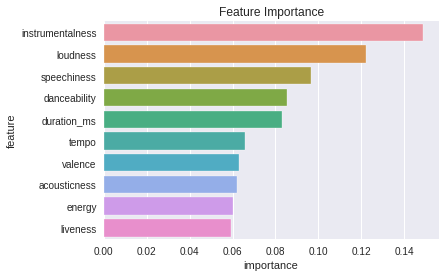

In [934]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),x='importance',y='feature');

#**Hyperparameter Tuning with Random Forest**


**N_ESTIMATOR**

In [935]:
def n_estimator_error(n):
    model = RandomForestClassifier(n_jobs=-1,n_estimators=n, random_state=2)
    model.fit(X_train, train_target)
    train_acc = 1 - model.score(X_train, train_target)
    val_acc= 1 - model.score(X_val, val_target)
    
    return {'N_Estimator': n, 'Training Error': train_acc, 'Validation Error': val_acc}

In [936]:
n_errors=pd.DataFrame([n_estimator_error(n) for n in range(100,500)])
n_errors.sort_values('Validation Error',ascending=True)

,N_Estimator,Training Error,Validation Error
391,491,0.0,0.230137
390,490,0.0,0.230137
385,485,0.0,0.230137
399,499,0.0,0.232877
366,466,0.0,0.232877
...,...,...,...
7,107,0.0,0.254795
6,106,0.0,0.254795
5,105,0.0,0.254795
3,103,0.0,0.254795


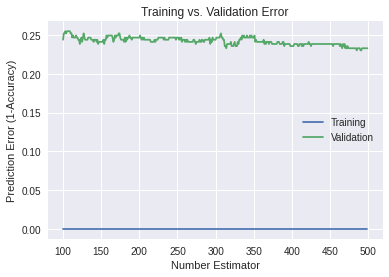

In [937]:
plt.figure()
plt.plot(n_errors['N_Estimator'], n_errors['Training Error'])
plt.plot(n_errors['N_Estimator'], n_errors['Validation Error'])
plt.title('Training vs. Validation Error')
# plt.xticks(range(2,128,8))
plt.xlabel('Number Estimator')
plt.ylabel('Prediction Error (1-Accuracy)')
plt.legend(['Training','Validation'])
plt.show()

In [938]:
model= RandomForestClassifier(n_jobs=-1,n_estimators=112,random_state=2).fit(X_train,train_target)
train_acc=model.score(X_train,train_target)
val_acc=model.score(X_val,val_target)
print('Train_accuracy:{:.2f}\nVal_accuracy:{:.2f}'.format(train_acc*100,val_acc*100))

Train_accuracy:100.00
Val_accuracy:75.34


#Features

In [939]:
def max_features(n):
    model = RandomForestClassifier(n_jobs=-1,max_features=n, random_state=2)
    model.fit(X_train, train_target)
    train_acc = 1 - model.score(X_train, train_target)
    val_acc= 1 - model.score(X_val, val_target)
    
    return {'Max Feature': n, 'Training Error': train_acc, 'Validation Error': val_acc}
    

In [940]:
feature_error=pd.DataFrame(max_features(n) for n in range(1,12))
feature_error.sort_values('Validation Error',ascending=True)

,Max Feature,Training Error,Validation Error
6,7,0.0,0.230137
4,5,0.0,0.235616
9,10,0.0,0.235616
3,4,0.0,0.243836
7,8,0.0,0.243836
8,9,0.0,0.243836
1,2,0.0,0.246575
5,6,0.0,0.246575
10,11,0.0,0.252055
2,3,0.0,0.260274


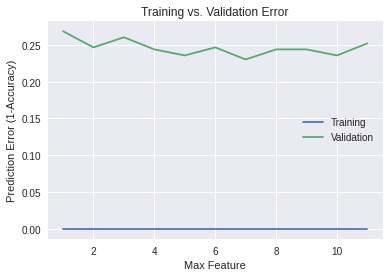

In [941]:
plt.figure()
plt.plot(feature_error['Max Feature'], feature_error['Training Error'])
plt.plot(feature_error['Max Feature'], feature_error['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xlabel('Max Feature')
plt.ylabel('Prediction Error (1-Accuracy)')
plt.legend(['Training','Validation'])
plt.show()

In [942]:
model= RandomForestClassifier(n_jobs=-1,max_features=3,random_state=2).fit(X_train,train_target)
train_acc=model.score(X_train,train_target)
val_acc=model.score(X_val,val_target)
preds=model.predict(X_val)
print('Train_accuracy:{:.2f}\nVal_accuracy:{:.2f}'.format(train_acc*100,val_acc*100))

Train_accuracy:100.00
Val_accuracy:73.97


#Max Depth

In [943]:
def max_depth_error(n):
    model=RandomForestClassifier(n_jobs=-1,max_depth=n,random_state=2).fit(X_train,train_target)
    train_acc=1 - model.score(X_train,train_target)
    val_acc=1 - model.score(X_val,val_target)
    return {'Max Depth': n,'Training Error': train_acc,'Validation Error': val_acc}

In [944]:
md_error=pd.DataFrame([max_depth_error(n) for n in range(1,25)])
md_error.sort_values('Validation Error', ascending=True)

,Max Depth,Training Error,Validation Error
16,17,0.000000,0.221918
11,12,0.003660,0.227397
18,19,0.000000,0.235616
6,7,0.075938,0.235616
14,15,0.000000,0.238356
...,...,...,...
7,8,0.051235,0.263014
3,4,0.190302,0.279452
2,3,0.212260,0.293151
1,2,0.247027,0.334247


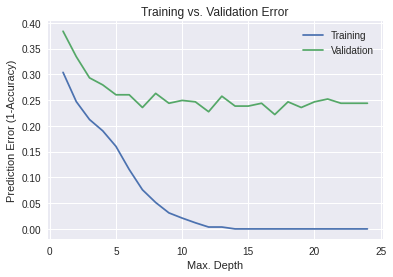

In [945]:
plt.figure()
plt.plot(md_error['Max Depth'], md_error['Training Error'])
plt.plot(md_error['Max Depth'], md_error['Validation Error'])
plt.title('Training vs. Validation Error')
# plt.xticks(range(2,128,8))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1-Accuracy)')
plt.legend(['Training','Validation'])
plt.show()

In [946]:
model=RandomForestClassifier(n_jobs=-1,n_estimators=112,max_features=3,max_depth=16,random_state=2).fit(X_train,train_target)
model.score(X_val,val_target)

0.7506849315068493

In [947]:
model.score(X_test,test_target)

0.736986301369863

#Final 

In [948]:
 #Create a model that guess randomly
def random_guess(inputs):
    return np.random.choice([0,1], len(inputs))
#Create a model that always save the song
def all_save(inputs):
    return np.full(len(inputs), 1)
# Create a model that discard all song
def all_discard(inputs):
    return np.full(len(inputs), 0)

In [949]:
guess=accuracy_score(test_target,random_guess(X_test))
save=accuracy_score(test_target, all_save(X_test))
discard=accuracy_score(test_target,all_discard(X_test))
print('Accuracy Random Guess: {:.2f}%\nAccuracy All Save: {:.2f}%\nAccuracy All Discard: {:.2f}%'.format(guess*100,save*100,discard*100))

Accuracy Random Guess: 49.32%
Accuracy All Save: 51.23%
Accuracy All Discard: 48.77%
